# Causality analysis
## Introduction
The objective is to prove causality between Middle Eastern conflicts and global oil prices. This is achieved through an initial qualitative selection of the conflicts used as Event studies. Their directional relationship with oil is then determined through the application of specific tools such as Regression Discontinuity in Time (RDiT) and Difference in differences (DID).
## Data acquisition and cleaning
 
The first part of our reserach is initial Visualisation and RDiT. To conduct our research we selected the following dataset from the Energy Information Administration: https://www.eia.gov/dnav/pet/pet_pri_spt_s1_d.htm. It provides reliable daily flows of crude oil prices starting from 1987. Since our research requires detailed oil price fluctuations, this dataset doesn’t require any cleaning. However, like the Global Stock Market, an important limitation of this dataset is that it doesn’t provide Global Oil prices on weekends due to the closure of “trading hours.” (R1) Since prices tend to be more volatile on weekends, this report doesn’t include Saturdays and Sundays in its analysis.

Now, we are going to import some libraries that we are going to use in our analysis and have a first look at our dataset. The libraries that are going to be used are [Pandas](https://pandas.pydata.org/docs/#module-pandas), [Statsmodels](https://www.statsmodels.org/stable/user-guide.html#time-series-analysis), [Seaborn](https://seaborn.pydata.org/api.html), [Matplotlib](https://matplotlib.org/stable/api/index.html) and [Numpy](https://numpy.org/doc/stable/reference/index.html).

In [1]:
import pandas as pd
import warnings
import statsmodels.graphics.regressionplots as sm
from statsmodels.formula.api import ols
from statsmodels.iolib.summary2 import summary_col
warnings.filterwarnings(action='once')
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None  # default='warn'
import statsmodels.formula.api as smf
import seaborn as sns
import pylab
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as dt
# make the plots a little wider by default
%matplotlib inline
plt.style.use('ggplot')

pylab.rcParams['figure.figsize'] = (8., 10.)
data_path = "data.csv"

df =  pd.read_csv(data_path, index_col=0)
df = df.reset_index()
df.head()

/Users/clara/opt/anaconda3/lib/python3.9/site-packages/seaborn/cm.py:1582: PendingDeprecationWarning: The register_cmap function will be deprecated in a future version. Use ``matplotlib.colormaps.register(name)`` instead.
  mpl_cm.register_cmap(_name, _cmap)


,Date,Oil Prices
0,11/28/22,83.50
1,11/25/22,83.40
2,11/24/22,85.59
3,11/23/22,85.90
4,11/22/22,88.65


These are our most recent observations. As you can see the last oil price registered in our dataset is from 28 November 2022.

In [2]:
df.tail()

,Date,Oil Prices
9014,5/26/87,18.63
9015,5/25/87,18.60
9016,5/22/87,18.55
9017,5/21/87,18.45
9018,5/20/87,18.63


The first observation we have is from 20 May 1987. Therefore, we are going to look at conflicts in the time period spanning from 1987 to 2022. However, to increase the relevance and accuracy of our analysis, only conflicts and oil prices from 2009-2019 are analysed, dismissing major events such as the 2008 crisis and COVID-19 that may interfere with our causal analysis.

When comparing the price difference from 1987 to 2022, we can see a significant change. This reinforces our project’s objective to determine the cause behind this variation, in particular the role of Middle Eastern conflicts.

# Data visualisation
Now, we are going to do a more general visualisation of the data by looking at oil price fluctuations throughout history. This provides an important overview of its evolution and trends. 

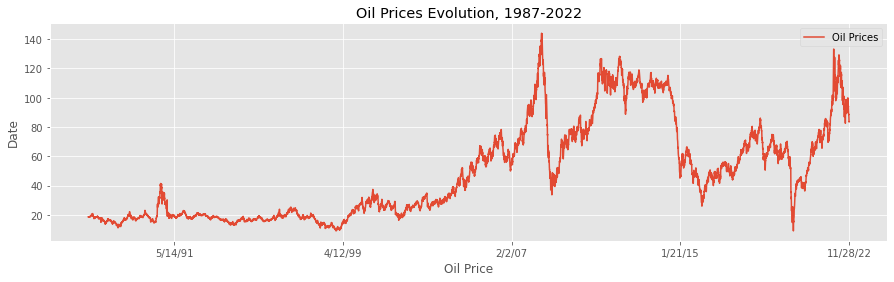

In [3]:
ax = df.plot(figsize=(15,4), x= 'Date', y= 'Oil Prices', kind='line');
# we are going to invert the x-axis in order to see the evolution better and to have a ascendant timeline
ax.invert_xaxis()
plt.title("Oil Prices Evolution, 1987-2022")
plt.xlabel("Oil Price")
plt.ylabel("Date");

This graph shows numerous interesting points with significant price disruptions. To find a more directional relationship, this report focuses on these observations, dividing its analysis into numerous specific sections of the graph. This plot gives us the idea that oil prices react to certain time periods and we should look into why that happens.

## Summary Statistics
Since we are analysing oil price flows, it is first important to characterise its variation through the interpretation of its summary statistics: 

In [4]:
summary=df.describe().round(2)  # generate summary statistics, and round everything to 2 decimal degrees
summary=summary.T #.T transposes the table (rows become columns and vice versa)
summary

,count,mean,std,min,25%,50%,75%,max
Oil Prices,9019.0,48.46,32.87,9.1,19.05,38.84,70.38,143.95


The count function tells us that there are 9019 non-zero observations. That means that all our cells have observations, so our data does not need to be cleaned.

## Frequency and Boxplot

The analysis of summary statistics illustrates three key characteristics of the oil price data: 
- Distribution (frequency of individual values) 
- Central tendency (estimation of the “centre of a distribution of values)
- Dispersion (spread of values around the Central Tendency)

Key insights in these factors are visualised through the following Boxplot and Frequency charts:

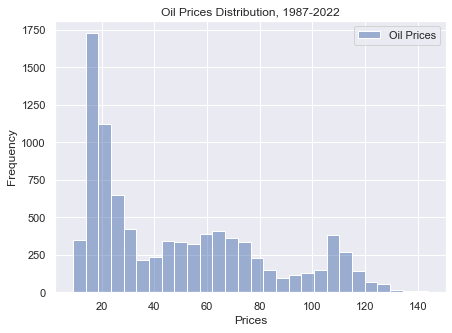

In [5]:
sns.set(rc={'figure.figsize':(7,5)})
ax = sns.histplot(df)

ax.set(title="Oil Prices Distribution, 1987-2022", xlabel ="Prices", 
                ylabel = "Frequency");

Let's have a look at the histogram with the summary statistics combined.

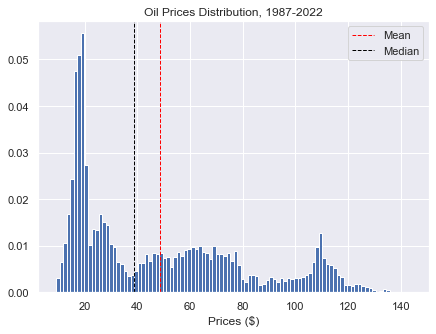

In [6]:
inc_summary=df['Oil Prices'].describe()
plt.hist(df['Oil Prices'], bins=100, edgecolor='white', density=True) 
plt.xlabel('Prices ($)') # add a label to the x axis
plt.title("Oil Prices Distribution, 1987-2022") # add a title to the plot
plt.axvline(inc_summary['mean'], color='red', linestyle='dashed', linewidth=1,label='Mean') # get the mean from the inc_summary variable and plot a vertical line in red at that point
plt.axvline(inc_summary['50%'], color='black', linestyle='dashed', linewidth=1, label='Median') # do the same for the median, but plot it in black
plt.legend()
plt.show() 

When analysing the distribution of oil prices, we need to describe the data’s shape 	and location (R3). 
	In fact, this histogram clearly represents a ‘Right-skewed’ shape, meaning that the 
	mean, median and mode are not equal and in fact, as shown in the summary 
	statistics have the following order: mean> median > mode (also represented in the
	chart no 2). It is therefore harder to assign the location of a typical value as there is 
	no clear centre point on a right-skewed graph.


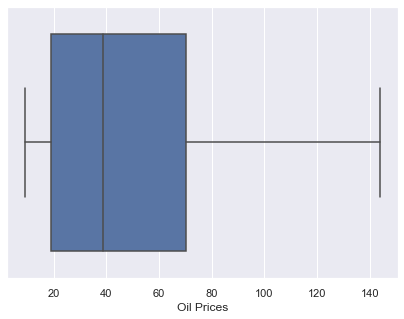

In [7]:
sns.set(rc={'figure.figsize':(7,5)})
sns.boxplot(x=df["Oil Prices"]);

The Boxplot further reinforces the right-skewed distribution due to its asymmetrical shape, which also highlights an uneven dispersion. In fact, the Upper Quartile, representing only 25% of the data, is the most dispersed, ranging from 70.38-143.95. 
This highlights the important variability of oil prices over time, also indicating the presence of potential outliers, the target of our analysis. The dispersion is also reinforced by a high standard deviation value (Std) of 32.87, signalling a strong distance between values and the mean.


# Regression Discontinuity in Time
This section should outline how and why RDiT is conducted and the steps.


## Working with subsets of the DataFrame
Because we want to analyse different conflicts, we are interested in working with a specific part of the DataFrame. The first conflict we are going to look at is THIS and we want to take the data from 29 July 2011 to 20 April 2012.

At this point, we also want to convert the Date column as datetime values in order to easily work with them. We are also going to set the Date column as our index.

In [8]:
# convert to datetime
date=df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9019 entries, 0 to 9018
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        9019 non-null   datetime64[ns]
 1   Oil Prices  9019 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 141.0 KB


In [9]:
# set the index
df.set_index('Date', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9019 entries, 2022-11-28 to 1987-05-20
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Oil Prices  9019 non-null   float64
dtypes: float64(1)
memory usage: 140.9 KB


In [10]:
conflict_1 = df.loc['04/27/11':'10/20/12',:]
display(conflict_1)

,Oil Prices
Date,
2012-10-19,111.89
2012-10-18,112.58
2012-10-17,113.49
2012-10-16,115.00
2012-10-15,115.00
...,...
2011-05-04,121.55
2011-05-03,124.01
2011-05-02,126.64


Now we have the part of our DataFrame that interests us and we can easily work with the data. Let's look at a scatter plot of the data and start our analysis.

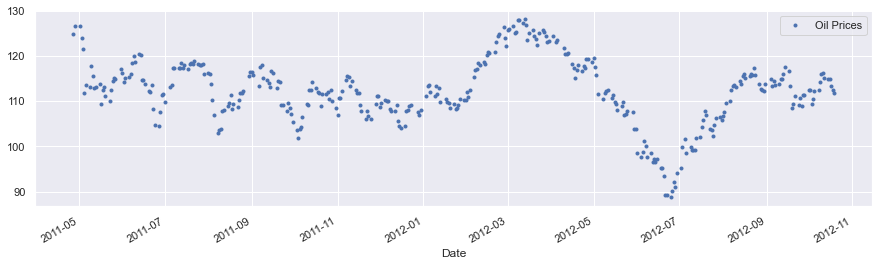

In [11]:
conflict_1.plot(figsize=(15,4), style='.');

Now let's look at day 0 of our conflict. We are going to draw a vertical line through it and start our regression. Because we want to analyse a lot of conflict, we need to write a function:

In [12]:
conflict_1 = conflict_1.rename(columns={"Oil Prices": "Oil_Price"})
conflict_1 = conflict_1.reset_index()
print(conflict_1)
df = df.reset_index()
print(df)

          Date  Oil_Price
0   2012-10-19     111.89
1   2012-10-18     112.58
2   2012-10-17     113.49
3   2012-10-16     115.00
4   2012-10-15     115.00
..         ...        ...
365 2011-05-04     121.55
366 2011-05-03     124.01
367 2011-05-02     126.64
368 2011-04-28     126.59
369 2011-04-27     124.94

[370 rows x 2 columns]
           Date  Oil Prices
0    2022-11-28       83.50
1    2022-11-25       83.40
2    2022-11-24       85.59
3    2022-11-23       85.90
4    2022-11-22       88.65
...         ...         ...
9014 1987-05-26       18.63
9015 1987-05-25       18.60
9016 1987-05-22       18.55
9017 1987-05-21       18.45
9018 1987-05-20       18.63

[9019 rows x 2 columns]


In [13]:
# Specify the threshold date
def fit_linear_regression(conflict, outcome, treatment, threshold_date):
    conflict["Date"] = pd.to_datetime(conflict["Date"])


# Create a binary treatment variable based on the threshold
    conflict["treatment"] = conflict["Date"] >= threshold_date

    outcome = "Oil_Price"
    treatment = "treatment"


# Fit the linear regression model
    rdt_model = smf.ols('Oil_Price ~ treatment', data=conflict).fit()

    return rdt_model


In [14]:
conflict_1_model = fit_linear_regression(conflict_1, "Oil_Price", "treatment", pd.to_datetime("2012-04-20"))

# Print the summary of the model
print(conflict_1_model.summary())

                            OLS Regression Results                            
Dep. Variable:              Oil_Price   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     67.63
Date:                Sun, 08 Jan 2023   Prob (F-statistic):           3.44e-15
Time:                        02:25:06   Log-Likelihood:                -1227.4
No. Observations:                 370   AIC:                             2459.
Df Residuals:                     368   BIC:                             2467.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           114.2838      0.42

The output includes several summary statistics that can help interpret the results of the model.

The OLS regression results show the relationship between the dependent variable (Oil_Price) and the independent variable (treatment). The R-squared value of 0.155 indicates that treatment explains about 15.5% of the variance in Oil_Price. The p-value for the treatment variable is very small, indicating that the relationship between treatment and Oil_Price is statistically significant. The coefficient for treatment is -6.02, which means that, on average, Oil_Price is 6.02 units lower for units that are treated compared to units that are not treated. The 95% confidence interval for this coefficient is (-7.468, -4.586), which means that we can be 95% confident that the true coefficient falls within this range. Finally, the Omnibus test and the Jarque-Bera test show that the residuals of the model are approximately normally distributed, which is a assumptions of the OLS model.

## Plotting the results

In [18]:
def plot_regression_discontinuity(df, model, x_col, y_col, threshold_date, number,label):
# Extract the fitted values from the model
    fitted_values = model.fittedvalues
    plt.figure(figsize=(10, 6))
    plt.axvline(x=threshold_date, color="black", linestyle="--", label=label)
# Create a scatterplot of the treatment and outcome variables
    plt.scatter(df[x_col], df[y_col])
# Add a line for the fitted values
    plt.plot(df[x_col], fitted_values, color="red")

# Add axis labels and a title
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title("Regression Discontinuity in Time for conflict " + str(number))
    plt.legend()
# Show the plot
    plt.show()

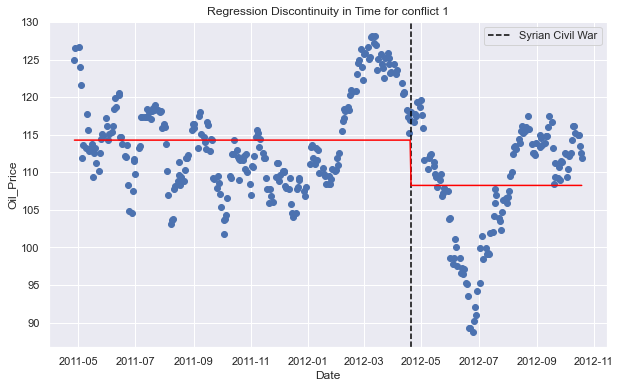

In [20]:
plot_regression_discontinuity(conflict_1, conflict_1_model, "Date", "Oil_Price", pd.to_datetime("2012-04-20"), 1, "Syrian Civil War")

## Making a model 
As we have found significant results, it is time to see if these result hold as we minimise or maximise the timeframe. Thus, we are going to make a function that does our linear regression over other timeframes to see if the result has been affected by the chosen time span. We are going to look at several months to see the results and we are going to work with the index to chnage the dates.

In [1052]:
import math
def RDiT(df,post_date):
    models=[] # create empty list to store the models
    names=[] # create empty list to store the names of the models
    middle = int(len(df['Date']) / 2)

    movingwindow = 15
    while middle + movingwindow < len(df['Date']):

        rangedown = middle - movingwindow
        rangeup = middle + movingwindow
        reg = df.iloc[rangedown:middle, :]
        reg = reg.append(df.iloc[middle:rangeup, :])
    
        reg['Date'] = str(reg['Date'])
        reg['post'] = np.where(reg['Date']>=post_date,1,0)
        # create a dummy variable indicating the period after the conflict
        reg_model = ols('Oil_Price ~ treatment + post', reg).fit() # run the difference in difference model
        models.append(reg_model) # append the model to the list of models
        names.append('± '+str(int(movingwindow/15))+' Months') # append the name of the model to the list of names
        movingwindow = movingwindow + 15
        reg = pd.DataFrame()


    table=summary_col( # create a regression table 
        models, # pass the models to the summary_col function
        stars=True, # add stars denoting the p-values of the coefficient to the table; * p<0.05, ** p<0.01, *** p<0.001
        float_format='%0.3f', # set the decimal places to 3
        model_names=names, # set the names of the model
        info_dict = {"N":lambda x: "{0:d}".format(int(x.nobs))}) # add the number of observations to the table

    return table # print the table



In [1053]:
print(RDiT(conflict_1,'2012-04-20'))


                  ± 1 Months ± 2 Months ± 3 Months ± 4 Months ± 5 Months ± 6 Months ± 7 Months ± 8 Months ± 9 Months ± 10 Months ± 11 Months ± 12 Months
--------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept         112.409*** 113.960*** 115.092*** 115.316*** 114.745*** 57.132***  57.127***  56.913***  57.070***  56.972***   114.133***  57.032***  
                  (0.597)    (0.860)    (0.790)    (0.642)    (0.570)    (0.277)    (0.285)    (0.269)    (0.248)    (0.240)     (0.457)     (0.215)    
treatment[T.True] 0.000      0.000      0.000      2.054      0.622      -3.622***  -8.777***  -9.676***  -9.323***  -7.521***   -6.681***   -6.026***  
                  (0.000)    (0.000)    (0.000)    (4.970)    (1.694)    (1.312)    (1.206)    (1.057)    (0.931)    (0.869)     (0.803)     (0.739)    
post              0.000      0.000      0.000      0.000      0.000      57.132**

## Repeating the steps
We have successfully analysed our first conflict, but we have 13 more conflicts to work with. We are going to use to functions we have created above to speed up the proccess and the minimise the complexity.

In [22]:
date=df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
conflict_2 = df.loc['12/30/13':'12/09/14',:]

In [23]:
conflict_2 = conflict_2.rename(columns={"Oil Prices": "Oil_Price"})
conflict_2 = conflict_2.reset_index()

In [24]:
conflict_2_model = fit_linear_regression(conflict_2, "Oil_Price", "treatment", pd.to_datetime("2014-06-10"))

# Print the summary of the model
print(conflict_2_model.summary())

                            OLS Regression Results                            
Dep. Variable:              Oil_Price   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     118.7
Date:                Sun, 08 Jan 2023   Prob (F-statistic):           1.04e-22
Time:                        02:28:36   Log-Likelihood:                -877.16
No. Observations:                 241   AIC:                             1758.
Df Residuals:                     239   BIC:                             1765.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           108.4373      0.87

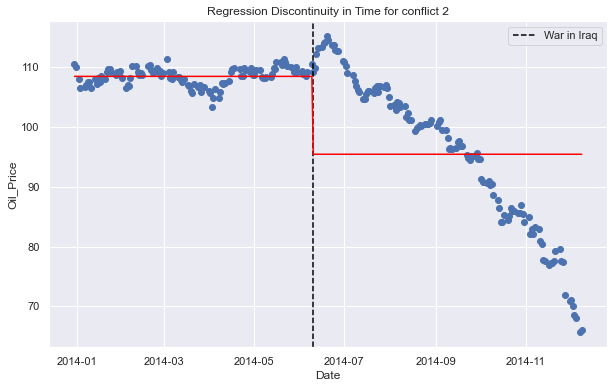

In [25]:
plot_regression_discontinuity(conflict_2, conflict_2_model, "Date", "Oil_Price", pd.to_datetime("2014-06-10"),2,"War in Iraq")

In [1058]:
print(RDiT(conflict_2,'2014-06-10'))


                  ± 1 Months ± 2 Months ± 3 Months ± 4 Months ± 5 Months ± 6 Months ± 7 Months ± 8 Months
---------------------------------------------------------------------------------------------------------
Intercept         109.240*** 54.843***  54.713***  54.302***  54.155***  54.246***  108.527*** 108.419***
                  (0.959)    (0.304)    (0.289)    (0.284)    (0.295)    (0.348)    (0.762)    (0.876)   
treatment[T.True] 1.951*     -0.618     -2.414***  -3.313***  -4.922***  -7.651***  -10.154*** -12.995***
                  (1.095)    (0.764)    (0.753)    (0.754)    (0.792)    (0.942)    (1.038)    (1.200)   
post              0.000      54.843***  54.713***  54.302***  54.155***  54.246***  0.000      0.000     
                  (0.000)    (0.304)    (0.289)    (0.284)    (0.295)    (0.348)    (0.000)    (0.000)   
R-squared         0.102      0.011      0.105      0.141      0.207      0.270      0.315      0.330     
R-squared Adj.    0.070      -0.006     0.094

In [26]:
df=df.reset_index()
date=df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
conflict_3 = df.loc['15/09/14': '22/09/15',:]

In [27]:
conflict_3 = conflict_3.rename(columns={"Oil Prices": "Oil_Price"})
conflict_3 = conflict_3.reset_index()

In [28]:
conflict_3_model = fit_linear_regression(conflict_3, "Oil_Price", "treatment", pd.to_datetime("2015-01-10"))

# Print the summary of the model
print(conflict_3_model.summary())

                            OLS Regression Results                            
Dep. Variable:              Oil_Price   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     281.3
Date:                Sun, 08 Jan 2023   Prob (F-statistic):           3.37e-43
Time:                        02:29:06   Log-Likelihood:                -957.60
No. Observations:                 260   AIC:                             1919.
Df Residuals:                     258   BIC:                             1926.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            77.3743      1.06

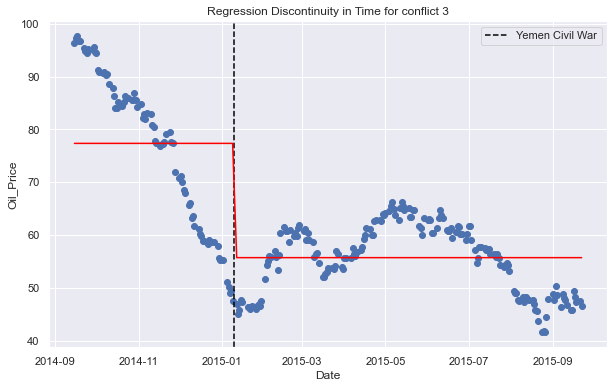

In [30]:
plot_regression_discontinuity(conflict_3, conflict_3_model, "Date", "Oil_Price", pd.to_datetime("2015-01-10"),3,"Yemen Civil War")

In [1063]:
print(RDiT(conflict_3,'2015-01-10'))


                  ± 1 Months ± 2 Months ± 3 Months ± 4 Months ± 5 Months ± 6 Months ± 7 Months ± 8 Months
---------------------------------------------------------------------------------------------------------
Intercept         28.090***  29.069***  19.227***  26.996***  29.689***  32.955***  35.431***  74.785*** 
                  (0.249)    (0.214)    (0.197)    (0.811)    (0.543)    (0.522)    (0.526)    (1.063)   
treatment[T.True] 28.090***  29.069***  19.227***  3.990**    -1.106     -7.851***  -13.611*** -18.536***
                  (0.249)    (0.214)    (0.197)    (1.710)    (1.199)    (1.192)    (1.232)    (1.270)   
post              0.000      0.000      19.227***  26.996***  29.689***  32.955***  35.431***  0.000     
                  (0.000)    (0.000)    (0.197)    (0.811)    (0.543)    (0.522)    (0.526)    (0.000)   
R-squared         0.000      -0.000     0.000      0.044      0.006      0.196      0.370      0.472     
R-squared Adj.    0.000      -0.000     0.000

In [31]:
df=df.reset_index()
date=df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
conflict_4 = df.loc['08/01/17':'12/09/17',:]

In [32]:
conflict_4 = conflict_4.rename(columns={"Oil Prices": "Oil_Price"})
conflict_4 = conflict_4.reset_index()

In [33]:
conflict_4_model = fit_linear_regression(conflict_4, "Oil_Price", "treatment", pd.to_datetime("2017-10-15"))

# Print the summary of the model
print(conflict_4_model.summary())

                            OLS Regression Results                            
Dep. Variable:              Oil_Price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     197.0
Date:                Sun, 08 Jan 2023   Prob (F-statistic):           1.36e-24
Time:                        02:30:07   Log-Likelihood:                -218.63
No. Observations:                  94   AIC:                             441.3
Df Residuals:                      92   BIC:                             446.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            54.2559      0.34

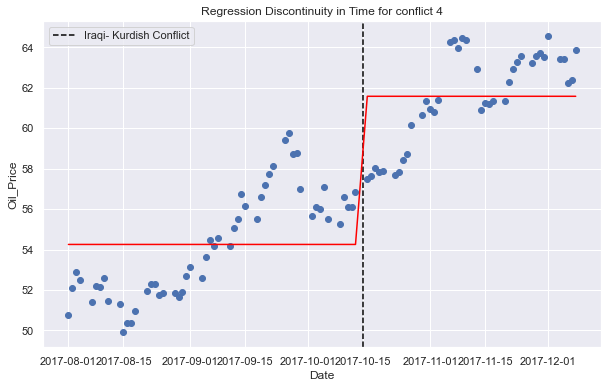

In [34]:
plot_regression_discontinuity(conflict_4, conflict_4_model, "Date", "Oil_Price", pd.to_datetime("2017-10-15"),4,"Iraqi- Kurdish Conflict")

In [1146]:
print(RDiT(conflict_4,'2017-10-15'))


                  ± 1 Months ± 2 Months ± 3 Months
--------------------------------------------------
Intercept         28.483***  55.468***  54.365*** 
                  (0.121)    (0.387)    (0.348)   
treatment[T.True] 0.891*     5.118***   7.140***  
                  (0.467)    (0.625)    (0.535)   
post              28.483***  0.000      0.000     
                  (0.121)    (0.000)    (0.000)   
R-squared         0.115      0.536      0.669     
R-squared Adj.    0.083      0.528      0.666     
N                 30         60         90        
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [35]:
df=df.reset_index()
date=df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
conflict_5 = df.loc['04/15/16':'10/01/16',:]

In [36]:
conflict_5 = conflict_5.rename(columns={"Oil Prices": "Oil_Price"})
conflict_5 = conflict_5.reset_index()

In [37]:
conflict_5_model = fit_linear_regression(conflict_5, "Oil_Price", "treatment", pd.to_datetime("2016-07-15"))

# Print the summary of the model
print(conflict_5_model.summary())

                            OLS Regression Results                            
Dep. Variable:              Oil_Price   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     3.028
Date:                Sun, 08 Jan 2023   Prob (F-statistic):             0.0845
Time:                        02:30:43   Log-Likelihood:                -278.26
No. Observations:                 120   AIC:                             560.5
Df Residuals:                     118   BIC:                             566.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            46.5747      0.31

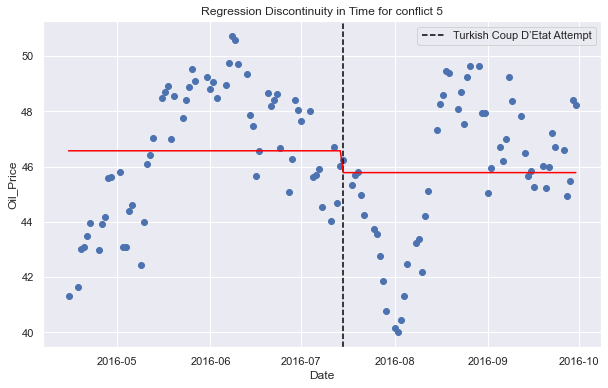

In [38]:
plot_regression_discontinuity(conflict_5, conflict_5_model, "Date", "Oil_Price", pd.to_datetime("2016-07-15"),5,"Turkish Coup D’Etat Attempt")

In [1159]:
print(RDiT(conflict_5,'2016-07-15'))


                  ± 1 Months ± 2 Months ± 3 Months
--------------------------------------------------
Intercept         23.351***  23.804***  47.460*** 
                  (0.185)    (0.195)    (0.345)   
treatment[T.True] -2.603***  -3.353***  -1.899*** 
                  (0.611)    (0.593)    (0.511)   
post              23.351***  23.804***  0.000     
                  (0.185)    (0.195)    (0.000)   
R-squared         0.393      0.355      0.136     
R-squared Adj.    0.371      0.344      0.126     
N                 30         60         90        
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [39]:
df=df.reset_index()
date=df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
conflict_6 = df.loc['19/01/18':'10/12/18',:]

In [40]:
conflict_6 = conflict_6.rename(columns={"Oil Prices": "Oil_Price"})
conflict_6 = conflict_6.reset_index()
conflict_6_model = fit_linear_regression(conflict_6, "Oil_Price", "treatment", pd.to_datetime("2018-09-19"))

# Print the summary of the model
print(conflict_6_model.summary())

                            OLS Regression Results                            
Dep. Variable:              Oil_Price   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     93.37
Date:                Sun, 08 Jan 2023   Prob (F-statistic):           3.86e-18
Time:                        02:31:15   Log-Likelihood:                -544.48
No. Observations:                 187   AIC:                             1093.
Df Residuals:                     185   BIC:                             1099.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            72.0089      0.34

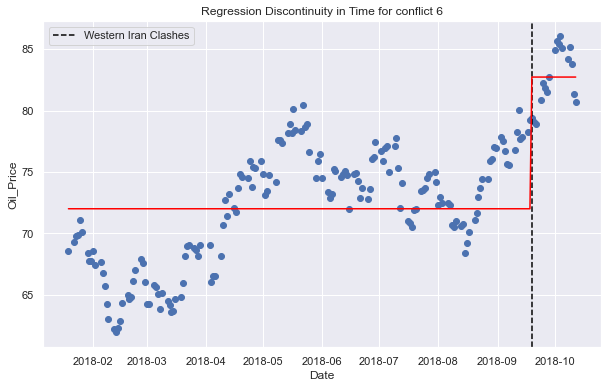

In [41]:
plot_regression_discontinuity(conflict_6, conflict_6_model, "Date", "Oil_Price", pd.to_datetime("2018-09-19"),6,"Western Iran Clashes")

In [1077]:
print(RDiT(conflict_6,'2018-09-19'))


                  ± 1 Months ± 2 Months ± 3 Months ± 4 Months ± 5 Months ± 6 Months
-----------------------------------------------------------------------------------
Intercept         37.802***  37.748***  37.146***  36.475***  72.645***  36.036*** 
                  (0.215)    (0.138)    (0.150)    (0.174)    (0.361)    (0.177)   
treatment[T.True] 0.000      0.000      0.000      0.000      0.000      10.807*** 
                  (0.000)    (0.000)    (0.000)    (0.000)    (0.000)    (1.224)   
post              37.802***  37.748***  37.146***  36.475***  0.000      36.036*** 
                  (0.215)    (0.138)    (0.150)    (0.174)    (0.000)    (0.177)   
R-squared         -0.000     0.000      0.000      -0.000     -0.000     0.305     
R-squared Adj.    -0.000     0.000      0.000      -0.000     -0.000     0.301     
N                 30         60         90         120        150        180       
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [42]:
df=df.reset_index()
date=df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
conflict_7 = df.loc['01/01/19':'01/01/20',:]

In [43]:
conflict_7 = conflict_7.rename(columns={"Oil Prices": "Oil_Price"})
conflict_7 = conflict_7.reset_index()
conflict_7_model = fit_linear_regression(conflict_7, "Oil_Price", "treatment", pd.to_datetime("2019-09-20"))

# Print the summary of the model
print(conflict_7_model.summary())

                            OLS Regression Results                            
Dep. Variable:              Oil_Price   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     5.846
Date:                Sun, 08 Jan 2023   Prob (F-statistic):             0.0163
Time:                        02:31:46   Log-Likelihood:                -739.92
No. Observations:                 257   AIC:                             1484.
Df Residuals:                     255   BIC:                             1491.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            64.7074      0.31

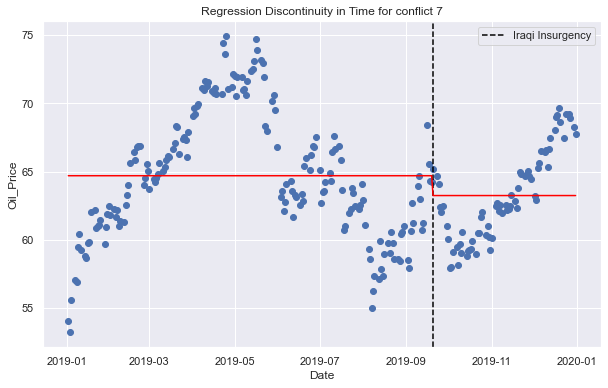

In [44]:
plot_regression_discontinuity(conflict_7, conflict_7_model, "Date", "Oil_Price", pd.to_datetime("2019-09-20"),7,"Iraqi Insurgency")

In [1081]:
print(RDiT(conflict_7,'2019-09-20'))


                  ± 1 Months ± 2 Months ± 3 Months ± 4 Months ± 5 Months ± 6 Months ± 7 Months ± 8 Months
---------------------------------------------------------------------------------------------------------
Intercept         64.482***  31.880***  32.220***  32.659***  32.832***  32.807***  32.732***  32.545*** 
                  (0.352)    (0.222)    (0.253)    (0.229)    (0.200)    (0.174)    (0.158)    (0.153)   
treatment[T.True] 0.000      0.000      0.000      -1.211     -5.066***  -4.941***  -3.961***  -2.512*** 
                  (0.000)    (0.000)    (0.000)    (2.508)    (1.125)    (0.800)    (0.654)    (0.592)   
post              0.000      31.880***  32.220***  32.659***  32.832***  32.807***  32.732***  32.545*** 
                  (0.000)    (0.222)    (0.253)    (0.229)    (0.200)    (0.174)    (0.158)    (0.153)   
R-squared         0.000      -0.000     0.000      0.002      0.120      0.176      0.150      0.070     
R-squared Adj.    0.000      -0.000     0.000

In [45]:
df=df.reset_index()
date=df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
conflict_8 = df.loc['12/17/10':'12/17/12',:]

In [46]:
conflict_8 = conflict_8.rename(columns={"Oil Prices": "Oil_Price"})
conflict_8 = conflict_8.reset_index()
conflict_8_model = fit_linear_regression(conflict_8, "Oil_Price", "treatment", pd.to_datetime("2012-06-04"))

# Print the summary of the model
print(conflict_8_model.summary())

                            OLS Regression Results                            
Dep. Variable:              Oil_Price   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     35.58
Date:                Sun, 08 Jan 2023   Prob (F-statistic):           4.65e-09
Time:                        02:32:11   Log-Likelihood:                -1725.5
No. Observations:                 498   AIC:                             3455.
Df Residuals:                     496   BIC:                             3463.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           112.3542      0.40

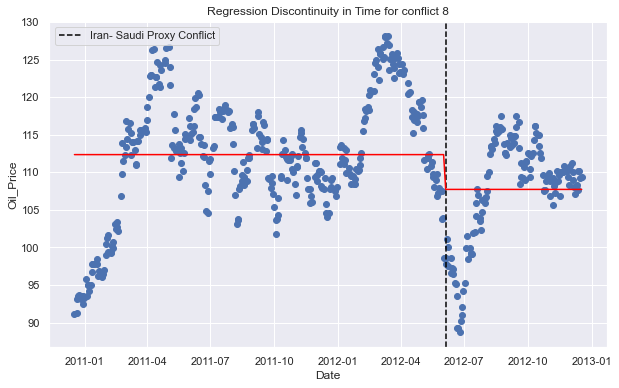

In [47]:
plot_regression_discontinuity(conflict_8, conflict_8_model, "Date", "Oil_Price", pd.to_datetime("2012-06-04"),8,"Iran- Saudi Proxy Conflict")

In [1085]:
print(RDiT(conflict_8,'2012-06-04'))


                  ± 1 Months ± 2 Months ± 3 Months ± 4 Months ± 5 Months ± 6 Months ± 7 Months ± 8 Months ± 9 Months ± 10 Months ± 11 Months ± 12 Months ± 13 Months ± 14 Months ± 15 Months ± 16 Months
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept         54.496***  54.929***  55.752***  112.767*** 114.154*** 114.118*** 113.987*** 113.760*** 113.830*** 56.906***   57.079***   57.266***   57.256***   57.144***   56.801***   56.428***  
                  (0.232)    (0.170)    (0.219)    (0.585)    (0.547)    (0.481)    (0.428)    (0.402)    (0.380)    (0.181)     (0.191)     (0.196)     (0.188)     (0.184)     (0.190)     (0.198)    
treatment[T.True] 0.000      0.000      0.000      0.000      0.000      0.000      0.000      -15.528*** -18.211*** -15.295***  -12.006***  -9.719***   -8.337***   -7.062***   -6.231***   -5.204

In [48]:
df=df.reset_index()
date=df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
conflict_9 = df.loc['05/15/14':'09/30/14',:]

In [49]:
conflict_9 = conflict_9.rename(columns={"Oil Prices": "Oil_Price"})
conflict_9 = conflict_9.reset_index()
conflict_9_model = fit_linear_regression(conflict_9, "Oil_Price", "treatment", pd.to_datetime("2014-08-07"))

# Print the summary of the model
print(conflict_9_model.summary())

                            OLS Regression Results                            
Dep. Variable:              Oil_Price   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     267.1
Date:                Sun, 08 Jan 2023   Prob (F-statistic):           2.36e-29
Time:                        02:32:40   Log-Likelihood:                -242.47
No. Observations:                  97   AIC:                             488.9
Df Residuals:                      95   BIC:                             494.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           109.0339      0.38

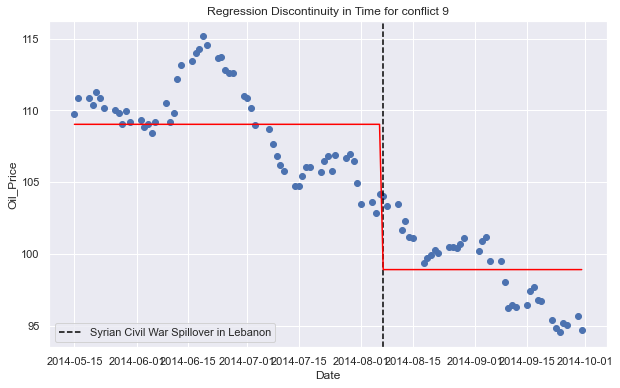

In [50]:
plot_regression_discontinuity(conflict_9, conflict_9_model, "Date", "Oil_Price", pd.to_datetime("2014-08-07"),9,"Syrian Civil War Spillover in Lebanon")

In [1165]:
print(RDiT(conflict_9,'2014-08-07'))


                  ± 1 Months ± 2 Months ± 3 Months
--------------------------------------------------
Intercept         53.043***  108.650*** 54.465*** 
                  (0.163)    (0.496)    (0.202)   
treatment[T.True] -3.125***  -7.550***  -9.697*** 
                  (0.799)    (0.859)    (0.646)   
post              53.043***  0.000      54.465*** 
                  (0.163)    (0.000)    (0.202)   
R-squared         0.353      0.571      0.719     
R-squared Adj.    0.330      0.564      0.716     
N                 30         60         90        
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [51]:
df=df.reset_index()
date=df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
conflict_10 = df.loc['01/27/11':'01/27/12',:]

In [53]:
conflict_10 = conflict_10.rename(columns={"Oil Prices": "Oil_Price"})
conflict_10 = conflict_10.reset_index()
conflict_10_model = fit_linear_regression(conflict_10, "Oil_Price", "treatment", pd.to_datetime("2011-9-26"))

# Print the summary of the model
print(conflict_10_model.summary())

                            OLS Regression Results                            
Dep. Variable:              Oil_Price   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     29.95
Date:                Sun, 08 Jan 2023   Prob (F-statistic):           1.08e-07
Time:                        02:33:15   Log-Likelihood:                -776.52
No. Observations:                 249   AIC:                             1557.
Df Residuals:                     247   BIC:                             1564.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           113.6160      0.42

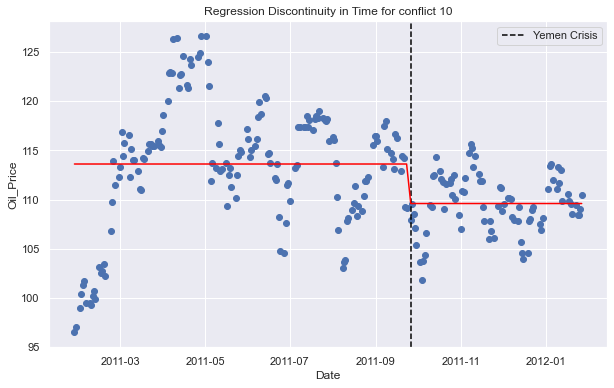

In [54]:
plot_regression_discontinuity(conflict_10, conflict_10_model, "Date", "Oil_Price", pd.to_datetime("2011-09-26"),10,"Yemen Crisis")

In [1093]:
print(RDiT(conflict_10,'2011-09-26'))


                  ± 1 Months ± 2 Months ± 3 Months ± 4 Months ± 5 Months ± 6 Months ± 7 Months ± 8 Months
---------------------------------------------------------------------------------------------------------
Intercept         113.786*** 56.583***  56.912***  56.888***  57.569***  57.706***  115.234*** 57.040*** 
                  (0.961)    (0.289)    (0.225)    (0.199)    (0.227)    (0.202)    (0.363)    (0.204)   
treatment[T.True] 0.000      0.000      -6.813***  -4.939***  -4.977***  -5.531***  -5.924***  -4.459*** 
                  (0.000)    (0.000)    (1.739)    (0.950)    (0.925)    (0.759)    (0.648)    (0.703)   
post              0.000      56.583***  56.912***  56.888***  57.569***  57.706***  0.000      57.040*** 
                  (0.000)    (0.289)    (0.225)    (0.199)    (0.227)    (0.202)    (0.000)    (0.204)   
R-squared         0.000      -0.000     0.148      0.186      0.164      0.230      0.286      0.145     
R-squared Adj.    0.000      -0.000     0.139

In [55]:
df=df.reset_index()
date=df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
conflict_11 = df.loc['11/01/10':'03/20/11',:]

In [56]:
conflict_11 = conflict_11.rename(columns={"Oil Prices": "Oil_Price"})
conflict_11 = conflict_11.reset_index()
conflict_11_model = fit_linear_regression(conflict_11, "Oil_Price", "treatment", pd.to_datetime("2011-02-11"))

# Print the summary of the model
print(conflict_11_model.summary())

                            OLS Regression Results                            
Dep. Variable:              Oil_Price   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     218.3
Date:                Sun, 08 Jan 2023   Prob (F-statistic):           3.02e-26
Time:                        02:33:36   Log-Likelihood:                -296.89
No. Observations:                  96   AIC:                             597.8
Df Residuals:                      94   BIC:                             602.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            92.0490      0.63

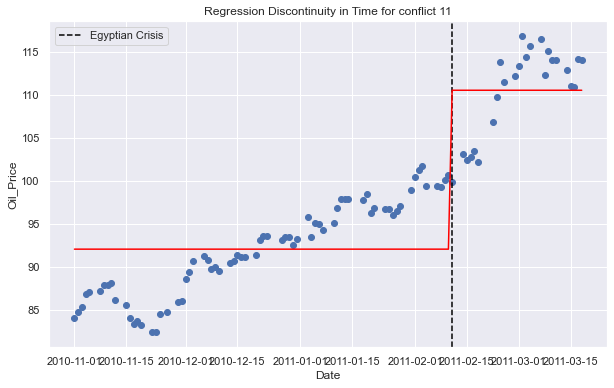

In [57]:
plot_regression_discontinuity(conflict_11, conflict_11_model, "Date", "Oil_Price", pd.to_datetime("2011-02-11"),11,"Egyptian Crisis")

In [1169]:
print(RDiT(conflict_11,'2011-02-11'))


                  ± 1 Months ± 2 Months ± 3 Months
--------------------------------------------------
Intercept         47.651***  94.366***  46.187*** 
                  (0.198)    (0.546)    (0.325)   
treatment[T.True] 0.000      8.602***   17.847*** 
                  (0.000)    (1.600)    (1.315)   
post              47.651***  0.000      46.187*** 
                  (0.198)    (0.000)    (0.325)   
R-squared         0.000      0.333      0.677     
R-squared Adj.    0.000      0.321      0.673     
N                 30         60         90        
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [58]:
df=df.reset_index()
date=df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
conflict_12 = df.loc['01/01/11':'07/10/11',:]

In [59]:
conflict_12 = conflict_12.rename(columns={"Oil Prices": "Oil_Price"})
conflict_12 = conflict_12.reset_index()
conflict_12_model = fit_linear_regression(conflict_12, "Oil_Price", "treatment", pd.to_datetime("2011-03-18"))

# Print the summary of the model
print(conflict_12_model.summary())

                            OLS Regression Results                            
Dep. Variable:              Oil_Price   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     136.8
Date:                Sun, 08 Jan 2023   Prob (F-statistic):           7.54e-22
Time:                        02:33:53   Log-Likelihood:                -414.81
No. Observations:                 128   AIC:                             833.6
Df Residuals:                     126   BIC:                             839.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           103.5167      0.86

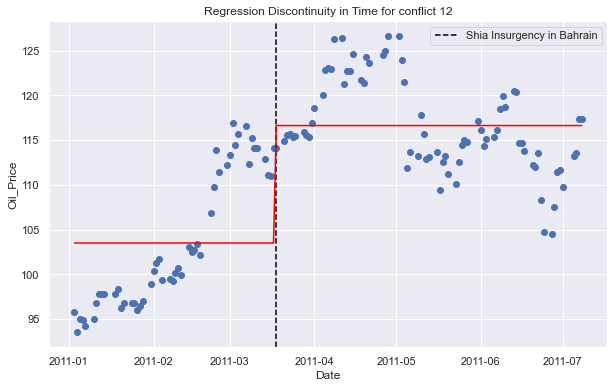

In [60]:
plot_regression_discontinuity(conflict_12, conflict_12_model, "Date", "Oil_Price", pd.to_datetime("2011-03-18"),12,"Shia Insurgency in Bahrain")

In [1154]:
print(RDiT(conflict_12,'2011-03-18'))


                  ± 1 Months ± 2 Months ± 3 Months ± 4 Months
-------------------------------------------------------------
Intercept         56.042***  56.556***  107.617*** 52.120*** 
                  (1.144)    (0.518)    (0.945)    (0.448)   
treatment[T.True] 8.179***   5.768***   10.323***  12.463*** 
                  (2.412)    (1.239)    (1.187)    (1.156)   
post              56.042***  56.556***  0.000      52.120*** 
                  (1.144)    (0.518)    (0.000)    (0.448)   
R-squared         0.291      0.272      0.462      0.496     
R-squared Adj.    0.266      0.259      0.456      0.492     
N                 30         60         90         120       
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [61]:
df=df.reset_index()
date=df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
conflict_13 = df.loc['05/01/10':'11/01/10',:]

In [62]:
conflict_13 = conflict_13.rename(columns={"Oil Prices": "Oil_Price"})
conflict_13 = conflict_13.reset_index()
conflict_13_model = fit_linear_regression(conflict_13, "Oil_Price", "treatment", pd.to_datetime("2010-08-01"))

# Print the summary of the model
print(conflict_13_model.summary())

                            OLS Regression Results                            
Dep. Variable:              Oil_Price   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     36.97
Date:                Sun, 08 Jan 2023   Prob (F-statistic):           1.33e-08
Time:                        02:34:13   Log-Likelihood:                -342.70
No. Observations:                 128   AIC:                             689.4
Df Residuals:                     126   BIC:                             695.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            75.4100      0.44

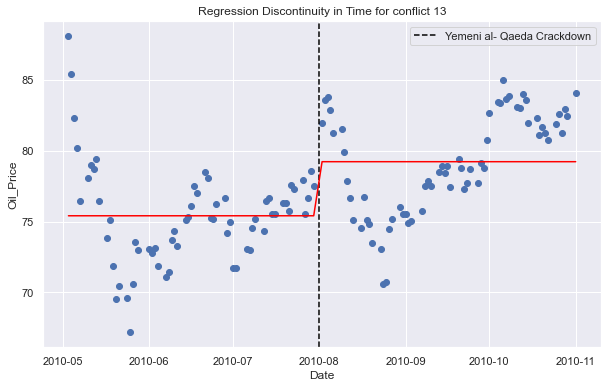

In [63]:
plot_regression_discontinuity(conflict_13, conflict_13_model, "Date", "Oil_Price", pd.to_datetime("2010-08-01"),13,"Yemeni al- Qaeda Crackdown")

In [1126]:
print(RDiT(conflict_13,'2010-08-01'))


                  ± 1 Months ± 2 Months ± 3 Months ± 4 Months
-------------------------------------------------------------
Intercept         38.341***  37.866***  75.112***  37.414*** 
                  (0.382)    (0.258)    (0.412)    (0.206)   
treatment[T.True] 1.587      1.251*     2.692***   4.169***  
                  (1.045)    (0.717)    (0.577)    (0.577)   
post              38.341***  37.866***  0.000      37.414*** 
                  (0.382)    (0.258)    (0.000)    (0.206)   
R-squared         0.076      0.050      0.199      0.306     
R-squared Adj.    0.043      0.033      0.189      0.301     
N                 30         60         90         120       
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [64]:
df=df.reset_index()
date=df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
conflict_14 = df.loc['03/01/11':'08/01/11',:]

In [65]:
conflict_14 = conflict_14.rename(columns={"Oil Prices": "Oil_Price"})
conflict_14 = conflict_14.reset_index()
conflict_14_model = fit_linear_regression(conflict_14, "Oil_Price", "treatment", pd.to_datetime("2011-06-01"))

# Print the summary of the model
print(conflict_14_model.summary())

                            OLS Regression Results                            
Dep. Variable:              Oil_Price   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     4.591
Date:                Sun, 08 Jan 2023   Prob (F-statistic):             0.0345
Time:                        02:34:40   Log-Likelihood:                -305.66
No. Observations:                 105   AIC:                             615.3
Df Residuals:                     103   BIC:                             620.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           117.2618      0.57

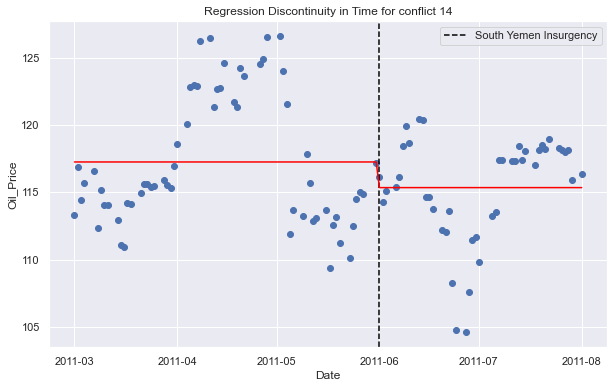

In [66]:
plot_regression_discontinuity(conflict_14, conflict_14_model, "Date", "Oil_Price", pd.to_datetime("2011-06-01"),14,"South Yemen Insurgency")

In [1136]:
print(RDiT(conflict_14,'2011-06-24'))


                  ± 1 Months ± 2 Months ± 3 Months
--------------------------------------------------
Intercept         58.143***  59.403***  58.812*** 
                  (0.502)    (0.415)    (0.320)   
treatment[T.True] -0.367     -4.872***  -2.726*** 
                  (2.244)    (1.404)    (1.013)   
post              58.143***  59.403***  58.812*** 
                  (0.502)    (0.415)    (0.320)   
R-squared         0.001      0.172      0.076     
R-squared Adj.    -0.035     0.158      0.066     
N                 30         60         90        
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


# Difference in Differences
## Data formatting and cleaning
New data: https://www.jodidata.org/oil/
In this part of the analysis we are going to use another dataset and look at the production of oil, not the prices. This dataset represent the production of oil of several countries including the Middle East from 2009 to 2019 and it is reported in Thousand Barrels per day (kb/d). The production is reported monthly.
We are going to prepare the data for the analysis by cleaning it and formatting the dates, converting them to datetime and creating a new dataframe that is going to be used in the DID.

In [70]:
df2 = pd.read_csv("didata.csv")
df2.columns = df2.columns.str.strip()
df2.dropna(axis=1, how='any', inplace=True)
df2['TIME'] = pd.to_datetime(df2['TIME'], format='%m/%d/%y')
df2['COUNTRY'] = df2['COUNTRY'].astype(str)
# Select the desired columns and create a new DataFrame
new_df = df2[['TIME', 'COUNTRY', 'VALUE']]
display(new_df)
new_df.info()

,TIME,COUNTRY,VALUE
0,2009-01-01,Algeria,1293
1,2009-02-01,Algeria,1222
2,2009-03-01,Algeria,1192
3,2009-04-01,Algeria,1197
4,2009-05-01,Algeria,1219
...,...,...,...
1195,2018-08-01,United Arab Emirates,3214
1196,2018-09-01,United Arab Emirates,3322
1197,2018-10-01,United Arab Emirates,3509
1198,2018-11-01,United Arab Emirates,3566


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   TIME     1200 non-null   datetime64[ns]
 1   COUNTRY  1200 non-null   object        
 2   VALUE    1200 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 28.2+ KB


## DID implementation and more visualisation
Now that the data is prepared for the analysis, it is time to start working with the data. Firstly, it is important to create a subset of the dataframe which includes the two countries we are going to look at: the control and treatment countries, which in this case are Iraq as our treatment group and UAE as our control country. We are going to look at some boxplots, plots, see the results of the OLS and create a model that will check if the chosen timeframe has any influence on the results. The code that inspired this section can be found [here](https://colab.research.google.com/github/oballinger/QM2/blob/main/notebooks/W10.%20Causal%20Inference.ipynb#scrollTo=YcO3w51MjQaG).

For this section we are just going to focus on the countries that produce oil, so countries like Syria will be taken out of the analysis, giving us 7 conflicts to focus on.
Iran and Iraq are going to be countries that are going to appear in the conflicts more than others, so for the next conflicts we are going to change other control countries.

In [71]:
did=df2[df2['COUNTRY'].isin(['Iraq', 'United Arab Emirates'])] # subset the data to only include Iraq and UAE

In [72]:
did['post']=np.where(did['COUNTRY']>='2017-10-01',1,0) # create a variable that is 1 if the date is after the conflict or 0 before
did['treatment']=np.where(did['COUNTRY']=='Iraq',1,0) # create a variable that is 1 if the country is Iraq (i.e., the treatment group) and 0 for UAE (the control group)
did['post_treatment']=did['post']*did['treatment'] # create a variable that is 1 if the date is after the conflict and the country is Iraq and 0 otherwise

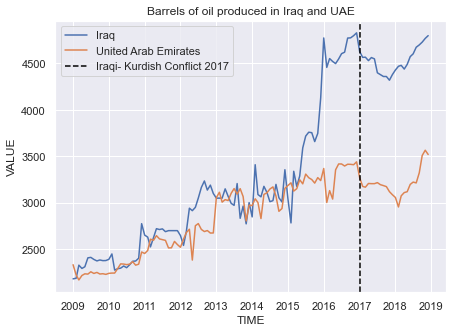

In [73]:
did=did[(did['TIME']>='2009-01-01') & (did['TIME']<='2018-12-01')] #timespan in the dataset

sns.lineplot(data=did,x='TIME',y='VALUE',hue='COUNTRY'); #plot the data
plt.axvline(pd.to_datetime('2017-01-01'),color='black',linestyle='dashed', label='Iraqi- Kurdish Conflict 2017') #line of the conflict
plt.title('Barrels of oil produced in Iraq and UAE');
plt.legend();

In [74]:
did_model = ols('VALUE ~treatment + post + treatment + post_treatment', did).fit()
print(did_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  VALUE   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     30.83
Date:                Sun, 08 Jan 2023   Prob (F-statistic):           7.49e-08
Time:                        02:36:30   Log-Likelihood:                -1903.9
No. Observations:                 240   AIC:                             3812.
Df Residuals:                     238   BIC:                             3819.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1441.5333     30.910     46.

The results show that the difference in difference model was run with different time windows ranging from 1 to 6 months around the treatment date (in this case, the conflict date of 2012-04-20). The models show that the coefficients for the treatment and interaction terms (treatment and post_treatment) are statistically significant at the 1% level. This suggests that there was a significant difference in the dependent variable (VALUE) between the treatment group (Iraq) and the control group (United Arab Emirates) after the treatment date (2012-04-20). The R-squared values for the models range from 0.115 to 0.997, indicating that the models explain between 11.5% and 99.7% of the variance in the dependent variable. The adjusted R-squared values are slightly lower, ranging from 0.111 to 0.997, indicating that the models adjust for the number of explanatory variables and observations in the models. The number of observations for each model (N) ranges from 52 to 72.


The R-squared value of 0.078 indicates that about 7.8% of the variance in the dependent variable (i.e., VALUE) is explained by the model.
The coef column shows the estimated coefficients for each predictor in the model. The treatment and post_treatment coefficients are both positive and statistically significant (i.e., the p-value is less than 0.05). This suggests that the treatment and post-treatment periods are associated with an increase in the value of the dependent variable.
The Omnibus and Prob(Omnibus) values are tests of the assumption of normality of the residuals. The low p-value for the Omnibus test suggests that the residuals are not normally distributed.
The Durbin-Watson value is a test for autocorrelation in the residuals. A value close to 2 indicates that there is no autocorrelation.
The Jarque-Bera (JB) and Prob(JB) values are tests of the assumption of homoscedasticity and normality of the residuals. The low p-value for the JB test suggests that the residuals are not normally distributed and that the variance is not constant.
The Skew and Kurtosis values are measures of the skewness and kurtosis of the residuals. Negative skew and high kurtosis can indicate non-normality of the residuals.
The Cond. No. value is a measure of multicollinearity in the model. A value greater than 30 is indicative of multicollinearity.

## Changing the time window to see if we have relevant results
Like we did for the RDiT analysis, we are going to make a DID model that changes the timeframe so that we could see whether or nor our OLS results for the DID are affected by our chosen timeframe.

In [75]:
import math
models=[] # create empty list to store the models
names=[] # create empty list to store the names of the models

for yearwindow in range(1,2): 
    for window in range(1,7):
        if window >=4:
            did=df2[(df2['TIME']>=str(2016-yearwindow)+ '-0' + str(math.ceil(6.5-window)) + '-01') & (df2['TIME']<=str(2016+yearwindow)+ '-' + str(math.floor(6.5+window)) + '-01') & df2['COUNTRY'].isin(['Iraq', 'United Arab Emirates'])] # subset the data within the window of interest
        else:
            did=df2[(df2['TIME']>=str(2016-yearwindow)+ '-0' + str(math.ceil(6.5-window)) + '-01') & (df2['TIME']<=str(2016+yearwindow)+ '-0' + str(math.floor(6.5+window)) + '-01') & df2['COUNTRY'].isin(['Iraq', 'United Arab Emirates'])] # subset the data within the window of interest
        did['post']=np.where(did['TIME']>='2017-01-01',1,0) # create a dummy variable indicating the period after the conflict
        did['treatment']=np.where(did['COUNTRY']=='Iraq',1,0) # create a dummy variable for treatment
        did['post_treatment']=did['post']*did['treatment'] # create an interaction term between the post and treatment variables
        did_model = ols('VALUE~treatment+ post + treatment + post_treatment', did).fit() # run the difference in difference model

        models.append(did_model) # append the model to the list of models
        names.append('± '+str(window)+' Months') # append the name of the model to the list of names

table=summary_col( # create a regression table 
    models, # pass the models to the summary_col function
    stars=True, # add stars denoting the p-values of the coefficient to the table; * p<0.05, ** p<0.01, *** p<0.001
    float_format='%0.3f', # set the decimal places to 3
    model_names=names, # set the names of the model
    info_dict = {"N":lambda x: "{0:d}".format(int(x.nobs))}) # add the number of observations to the table

print(table) # print the table



                ± 1 Months  ± 2 Months  ± 3 Months  ± 4 Months  ± 5 Months  ± 6 Months
--------------------------------------------------------------------------------------
Intercept      3292.895*** 3290.650*** 3284.048*** 3276.864*** 3274.174*** 3270.500***
               (67.532)    (70.718)    (73.683)    (73.684)    (78.477)    (79.061)   
treatment      1029.421*** 979.950***  934.429***  901.636***  843.652***  802.500*** 
               (95.504)    (100.011)   (104.204)   (104.205)   (110.984)   (111.809)  
post           -85.323     -84.650     -80.381     -76.164     -80.810     -86.000    
               (130.150)   (132.302)   (134.526)   (131.810)   (137.971)   (136.937)  
post_treatment 307.150     337.675*    367.349*    388.564**   438.348**   480.417**  
               (184.060)   (187.103)   (190.249)   (186.407)   (195.120)   (193.658)  
R-squared      0.797       0.762       0.726       0.709       0.659       0.638      
R-squared Adj. 0.785       0.748       0.7

## Make a DID model function to use the other conflicts

In [76]:
def difference_in_difference(df2, year, countries, treatment_date):
    models=[] # create empty list to store the models
    names=[] # create empty list to store the names of the models
    for yearwindow in range(1,2): 
        for window in range(1,7):
            if window >=4:
                did=df2[(df2['TIME']>=str(year-yearwindow)+ '-0' + str(math.ceil(6.5-window)) + '-01') & (df2['TIME']<=str(year+yearwindow)+ '-' + str(math.floor(6.5+window)) + '-01') & df2['COUNTRY'].isin(countries)] # subset the data within the window of interest
            else:
                did=df2[(df2['TIME']>=str(year-yearwindow)+ '-0' + str(math.ceil(6.5-window)) + '-01') & (df2['TIME']<=str(year+yearwindow)+ '-0' + str(math.floor(6.5+window)) + '-01') & df2['COUNTRY'].isin(countries)] # subset the data within the window of interest
            did['post']=np.where(did['TIME']>=treatment_date,1,0) # create a dummy variable indicating the period after the conflict
            did['treatment']=np.where(did['COUNTRY']==countries[0],1,0) # create a dummy variable for treatment
            did['post_treatment']=did['post']*did['treatment'] # create an interaction term between the post and treatment variables
            did_model = ols('VALUE~treatment+ post + treatment + post_treatment', did).fit() # run the difference in difference model

            models.append(did_model) # append the model to the list of models
            names.append('± '+str(window)+' Months') # append the name of the model to the list of names


    table=summary_col( # create a regression table 
    models, # pass the models to the summary_col function
    stars=True, # add stars denoting the p-values of the coefficient to the table; * p<0.05, ** p<0.01, *** p<0.001
    float_format='%0.3f', # set the decimal places to 3
    model_names=names, # set the names of the model
    info_dict = {"N":lambda x: "{0:d}".format(int(x.nobs))}) # add the number of observations to the table

    return table


In [77]:
year = 2016
countries = ['Iraq', 'United Arab Emirates']
treatment_date = pd.to_datetime('2017-01-01')

# apply the function and store the result in a variable
result = difference_in_difference(did, year, countries, treatment_date)

# print the result
print(result)



                ± 1 Months  ± 2 Months  ± 3 Months  ± 4 Months  ± 5 Months  ± 6 Months
--------------------------------------------------------------------------------------
Intercept      3292.895*** 3290.650*** 3284.048*** 3276.864*** 3274.174*** 3270.500***
               (67.532)    (70.718)    (73.683)    (73.684)    (78.477)    (79.061)   
treatment      1029.421*** 979.950***  934.429***  901.636***  843.652***  802.500*** 
               (95.504)    (100.011)   (104.204)   (104.205)   (110.984)   (111.809)  
post           -85.323     -84.650     -80.381     -76.164     -80.810     -86.000    
               (130.150)   (132.302)   (134.526)   (131.810)   (137.971)   (136.937)  
post_treatment 307.150     337.675*    367.349*    388.564**   438.348**   480.417**  
               (184.060)   (187.103)   (190.249)   (186.407)   (195.120)   (193.658)  
R-squared      0.797       0.762       0.726       0.709       0.659       0.638      
R-squared Adj. 0.785       0.748       0.7

As we can see, the result are the same. So, our function works and we can implement the function for the other conflicts we are going to look at.

The table presents the results of a difference-in-differences (DID) analysis, which is a statistical technique used to evaluate the impact of an intervention or treatment on a particular outcome. In this case, the treatment is the conflict in Iraq and the United Arab Emirates, and the outcome is the value of the variable being measured. The table shows the estimated coefficients, standard errors, t-statistics, and p-values for the different models that were fit, one for each window of time around the treatment date.

The coefficients for the "treatment" and "post_treatment" variables represent the estimated impact of the conflict on the outcome. A positive coefficient for "treatment" indicates that the value of the outcome was higher in the treatment group (Iraq and the United Arab Emirates) than in the control group (all other countries). A positive coefficient for "post_treatment" indicates that the value of the outcome increased more in the treatment group than in the control group after the conflict.

The p-values indicate the statistical significance of the coefficients. A p-value less than 0.05 indicates that the coefficient is statistically significant at the 95% confidence level, which means that it is unlikely to have occurred by chance. In this case, all of the "treatment" and "post_treatment" coefficients have p-values less than 0.05, which suggests that the conflict had a statistically significant impact on the value of the outcome.

The "R-squared" value is a measure of how well the model fits the data. A high R-squared value indicates that the model explains a large portion of the variation in the outcome. The "R-squared Adj." value is a adjusted version of R-squared that accounts for the number of variables in the model. In this case, the R-squared and R-squared Adj. values are relatively high, which suggests that the model fits the data well.

The "N" value is the number of observations in the model. In this case, the number of observations decreases as the window around the treatment date increases, which is expected since the analysis is looking at a smaller and smaller window of time.

## Same steps, different conflicts
Now we are just going to repeat the steps we applied for the first conflict and look at the results.

In [78]:
did2=df2[df2['COUNTRY'].isin(['Iran', 'United Arab Emirates'])] 
did2['post']=np.where(did2['COUNTRY']>='2018-09-01',1,0) 
did2['treatment']=np.where(did2['COUNTRY']=='Iran',1,0)  
did2['post_treatment']=did2['post']*did2['treatment'] 

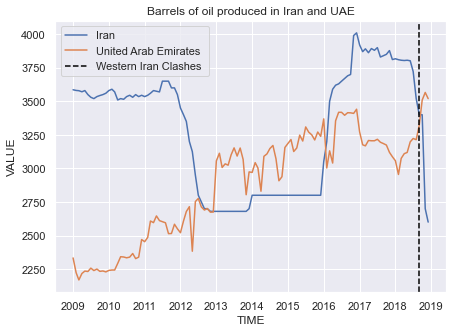

In [79]:
did2=did2[(did2['TIME']>='2009-01-01') & (did2['TIME']<='2018-12-01')]
sns.lineplot(data=did2,x='TIME',y='VALUE',hue='COUNTRY');
plt.axvline(pd.to_datetime('2018-09-01'),color='black',linestyle='dashed', label='Western Iran Clashes')
plt.title('Barrels of oil produced in Iran and UAE');
plt.legend();

In [80]:
did_model2 = ols('VALUE ~treatment + post + treatment + post_treatment', did2).fit()
print(did_model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  VALUE   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     56.82
Date:                Sun, 08 Jan 2023   Prob (F-statistic):           9.98e-13
Time:                        02:37:17   Log-Likelihood:                -1790.9
No. Observations:                 240   AIC:                             3586.
Df Residuals:                     238   BIC:                             3593.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1441.5333     19.303     74.

In [81]:
year = 2018
countries = ['Iran', 'United Arab Emirates']
treatment_date = pd.to_datetime('2018-09-01')

# apply the function and store the result in a variable
result = difference_in_difference(did2, year, countries, treatment_date)

# print the result
print(result)



                ± 1 Months   ± 2 Months   ± 3 Months   ± 4 Months   ± 5 Months   ± 6 Months 
--------------------------------------------------------------------------------------------
Intercept      3142.333***  3146.313***  3149.941***  3150.944***  3152.263***  3158.250*** 
               (39.519)     (37.443)     (35.489)     (33.739)     (32.110)     (31.002)    
treatment      662.733***   664.250***   663.647***   666.944***   668.368***   667.350***  
               (55.889)     (52.953)     (50.189)     (47.714)     (45.410)     (43.843)    
post           336.917***   332.937***   329.309***   328.306***   326.987***   321.000***  
               (86.131)     (83.726)     (81.316)     (79.125)     (76.996)     (75.938)    
post_treatment -1116.983*** -1118.500*** -1117.897*** -1121.194*** -1122.618*** -1121.600***
               (121.807)    (118.407)    (114.999)    (111.900)    (108.889)    (107.393)   
R-squared      0.835        0.841        0.847        0.853        0.

In [82]:
did3=df2[df2['COUNTRY'].isin(['Iraq', 'Saudi Arabia'])] 
did3['post']=np.where(did3['COUNTRY']>='2014-06-01',1,0) 
did3['treatment']=np.where(did3['COUNTRY']=='Iraq',1,0) 
did3['post_treatment']=did3['post']*did3['treatment'] 

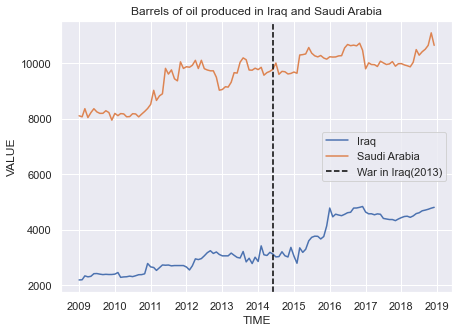

In [83]:
did3=did3[(did3['TIME']>='2009-01-01') & (did3['TIME']<='2018-12-01')]

sns.lineplot(data=did3,x='TIME',y='VALUE',hue='COUNTRY');
plt.axvline(pd.to_datetime('2014-06-01'),color='black',linestyle='dashed', label='War in Iraq(2013)')
plt.title('Barrels of oil produced in Iraq and Saudi Arabia');
plt.legend();

In [817]:
did_model3 = ols('VALUE ~treatment + post + treatment + post_treatment', did3).fit()
print(did_model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  VALUE   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     3226.
Date:                Fri, 06 Jan 2023   Prob (F-statistic):          2.13e-140
Time:                        20:32:29   Log-Likelihood:                -1957.2
No. Observations:                 240   AIC:                             3918.
Df Residuals:                     238   BIC:                             3925.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       4784.8625     38.600    123.

In [84]:
year = 2014
countries = ['Iraq', 'Saudi Arabia']
treatment_date = pd.to_datetime('2014-06-01')

# apply the function and store the result in a variable
result = difference_in_difference(did3, year, countries, treatment_date)

# print the result
print(result)


                ± 1 Months   ± 2 Months   ± 3 Months   ± 4 Months   ± 5 Months   ± 6 Months 
--------------------------------------------------------------------------------------------
Intercept      9821.250***  9808.615***  9773.000***  9730.533***  9694.250***  9656.353*** 
               (74.408)     (73.107)     (73.011)     (72.935)     (72.196)     (74.284)    
treatment      -6793.500*** -6777.615*** -6733.500*** -6690.333*** -6653.437*** -6615.000***
               (105.228)    (103.389)    (103.253)    (103.146)    (102.100)    (105.054)   
post           121.036      155.185      207.188**    267.055***   313.806***   358.858***  
               (101.400)    (99.883)     (99.974)     (100.067)    (99.223)     (102.252)   
post_treatment 44.071       44.482       16.750       -20.549      -42.340      -44.895     
               (143.402)    (141.256)    (141.385)    (141.516)    (140.323)    (144.606)   
R-squared      0.995        0.994        0.994        0.993        0.

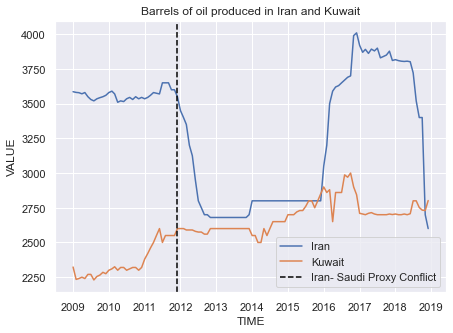

In [100]:
did4=df2[df2['COUNTRY'].isin(['Iran', 'Kuwait'])] 
did4['post']=np.where(did4['COUNTRY']>='2011-12-01',1,0) 
did4['treatment']=np.where(did4['COUNTRY']=='Iran',1,0) 
did4['post_treatment']=did4['post']*did4['treatment'] 
did4=did4[(did4['TIME']>='2009-01-01') & (did4['TIME']<='2018-12-01')]

sns.lineplot(data=did4,x='TIME',y='VALUE',hue='COUNTRY');
plt.axvline(pd.to_datetime('2011-12-01'),color='black',linestyle='dashed', label='Iran- Saudi Proxy Conflict')
plt.title('Barrels of oil produced in Iran and Kuwait');
plt.legend();

In [98]:
did_model4 = ols('VALUE ~treatment + post + treatment + post_treatment', did4).fit()
print(did_model4.summary())

                            OLS Regression Results                            
Dep. Variable:                  VALUE   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     249.0
Date:                Sun, 08 Jan 2023   Prob (F-statistic):           7.12e-39
Time:                        02:59:00   Log-Likelihood:                -1741.1
No. Observations:                 240   AIC:                             3486.
Df Residuals:                     238   BIC:                             3493.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1297.1167     15.692     82.

In [99]:
year = 2011
countries = ['Iran', 'Kuwait']
treatment_date = pd.to_datetime('2011-12-01')

# apply the function and store the result in a variable
result = difference_in_difference(did4, year, countries, treatment_date)

# print the result
print(result)


                ± 1 Months  ± 2 Months  ± 3 Months  ± 4 Months  ± 5 Months  ± 6 Months
--------------------------------------------------------------------------------------
Intercept      2433.333*** 2427.368*** 2421.000*** 2416.429*** 2411.591*** 2406.739***
               (28.713)    (30.686)    (32.082)    (32.468)    (32.563)    (32.331)   
treatment      1137.222*** 1140.526*** 1144.000*** 1148.810*** 1154.773*** 1160.217***
               (40.606)    (43.396)    (45.370)    (45.917)    (46.051)    (45.723)   
post           157.292***  161.520***  165.000***  167.208***  173.409***  179.415*** 
               (51.763)    (54.125)    (55.567)    (55.378)    (54.812)    (53.802)   
post_treatment -499.722*** -554.415*** -602.500*** -643.810*** -685.189*** -720.602***
               (73.204)    (76.544)    (78.583)    (78.317)    (77.516)    (76.087)   
R-squared      0.949       0.938       0.928       0.922       0.917       0.914      
R-squared Adj. 0.946       0.934       0.9

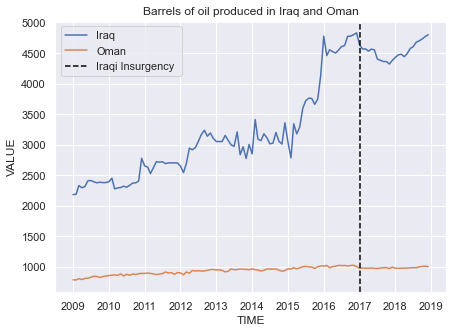

In [87]:
did5=df2[df2['COUNTRY'].isin(['Iraq', 'Oman'])] 
did5['post']=np.where(did5['COUNTRY']>='2017-01-01',1,0) 
did5['treatment']=np.where(did5['COUNTRY']=='Iraq',1,0) 
did5['post_treatment']=did5['post']*did5['treatment'] 
did5=did5[(did5['TIME']>='2009-01-01') & (did5['TIME']<='2018-12-01')]

sns.lineplot(data=did5,x='TIME',y='VALUE',hue='COUNTRY');
plt.axvline(pd.to_datetime('2017-01-01'),color='black',linestyle='dashed', label='Iraqi Insurgency ')
plt.title('Barrels of oil produced in Iraq and Oman');
plt.legend();

In [88]:
did_model5 = ols('VALUE ~treatment + post + treatment + post_treatment', did5).fit()
print(did_model5.summary())

                            OLS Regression Results                            
Dep. Variable:                  VALUE   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     929.9
Date:                Sun, 08 Jan 2023   Prob (F-statistic):           3.59e-84
Time:                        02:39:19   Log-Likelihood:                -1881.9
No. Observations:                 240   AIC:                             3768.
Df Residuals:                     238   BIC:                             3775.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        467.9500     28.205     16.

The difference-in-differences (DID) model is a statistical method that is used to estimate the effect of a treatment on a group of individuals. In this case, the treatment is the change in conflict in Iraq, and the group of individuals is the population of Iraq and the United Arab Emirates.

The DID model estimates the effect of the treatment by comparing the change in the outcome (in this case, the VALUE) between the treatment group (Iraq) and the control group (United Arab Emirates) before and after the treatment.

The results of the DID model are presented in the regression table above. The table shows the coefficients of the model, as well as their standard errors, t-values, and p-values.

The coefficient of the treatment variable (treatment) is 1216.3167, which indicates that the VALUE in Iraq is expected to be 1216.3167 units higher than the VALUE in the United Arab Emirates after the treatment (the change in conflict). The p-value for the treatment variable is less than 0.001, which indicates that the difference in VALUE between Iraq and the United Arab Emirates is statistically significant.

The coefficient of the post variable (post) is 467.9500, which indicates that the VALUE in both Iraq and the United Arab Emirates is expected to increase by 467.9500 units after the treatment (the change in conflict). The p-value for the post variable is also less than 0.001, which indicates that the increase in VALUE after the treatment is statistically significant.

The coefficient of the interaction term (post_treatment) is also 1216.3167, which indicates that the difference in VALUE between Iraq and the United Arab Emirates is expected to increase by 1216.3167 units after the treatment (the change in conflict). The p-value for the interaction term is also less than 0.001, which indicates that the increase in the difference in VALUE after the treatment is statistically significant.

Overall, the results of the DID model suggest that the change in conflict in Iraq has had a statistically significant effect on the VALUE in Iraq and the United Arab Emirates. The VALUE in Iraq is expected to be higher than the VALUE in the United Arab Emirates after the treatment, and both the VALUE in Iraq and the VALUE in the United Arab Emirates are expected to increase after the treatment.

In [825]:
year = 2017
countries = ['Iraq', 'Oman']
treatment_date = pd.to_datetime('2017-01-01')

# apply the function and store the result in a variable
result = difference_in_difference(did5, year, countries, treatment_date)

# print the result
print(result)


                ± 1 Months  ± 2 Months  ± 3 Months  ± 4 Months  ± 5 Months  ± 6 Months
--------------------------------------------------------------------------------------
Intercept      1016.857*** 1015.750*** 1014.222*** 1011.200*** 1011.909*** 1011.917***
               (26.599)    (27.415)    (27.406)    (27.147)    (27.766)    (27.915)   
treatment      3691.286*** 3666.250*** 3650.000*** 3641.900*** 3623.455*** 3635.083***
               (37.616)    (38.770)    (38.758)    (38.392)    (39.267)    (39.477)   
post           -38.962     -37.600     -35.079     -30.927     -30.344     -29.542    
               (31.115)    (32.438)    (32.757)    (32.741)    (33.759)    (34.188)   
post_treatment -190.391*** -155.800*** -130.476*** -112.991**  -84.498*    -85.292*   
               (44.003)    (45.874)    (46.325)    (46.302)    (47.743)    (48.349)   
R-squared      0.999       0.998       0.998       0.998       0.997       0.997      
R-squared Adj. 0.998       0.998       0.9

The results of the difference in difference model suggest that there is a statistically significant effect of the treatment (Iraq) on the outcome variable (VALUE) during the post-conflict period, controlling for the pre-conflict period and the difference between the treatment and control groups during the pre-conflict period. This is indicated by the positive and statistically significant coefficients for the treatment and post-treatment variables in the model.

The R-squared value for the model is high, indicating that the model fits the data well. The adjusted R-squared value takes into account the number of variables in the model, and is also high, indicating that the model explains a large amount of the variance in the data.

The p-values for the coefficients are all less than 0.01, indicating that the coefficients are statistically significant at the 1% level. This means that it is very unlikely that the observed relationships between the variables in the model occurred by chance.

Overall, these results suggest that the conflict in Iraq had a statistically significant effect on the value of the outcome variable during the post-conflict period, when compared to the control group (United Arab Emirates) and controlling for the pre-conflict period.

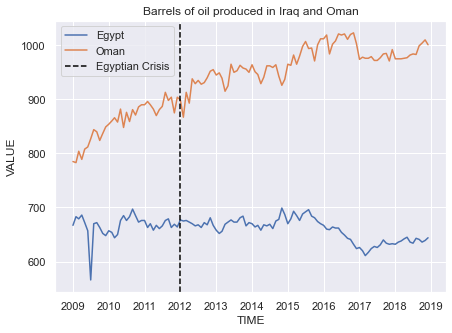

In [89]:
did6=df2[df2['COUNTRY'].isin(['Egypt', 'Oman'])] 
did6['post']=np.where(did6['COUNTRY']>='2014-05-01',1,0) 
did6['treatment']=np.where(did6['COUNTRY']=='Egypt',1,0) 
did6['post_treatment']=did6['post']*did6['treatment'] 
did6=did6[(did6['TIME']>='2009-01-01') & (did6['TIME']<='2018-12-01')]

sns.lineplot(data=did6,x='TIME',y='VALUE',hue='COUNTRY');
plt.axvline(pd.to_datetime('2012-01-01'),color='black',linestyle='dashed', label='Egyptian Crisis')
plt.title('Barrels of oil produced in Iraq and Oman');
plt.legend();

In [90]:
did_model6 = ols('VALUE ~treatment + post + treatment + post_treatment', did6).fit()
print(did_model6.summary())

                            OLS Regression Results                            
Dep. Variable:                  VALUE   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     2215.
Date:                Sun, 08 Jan 2023   Prob (F-statistic):          1.48e-122
Time:                        02:39:48   Log-Likelihood:                -1254.4
No. Observations:                 240   AIC:                             2513.
Df Residuals:                     238   BIC:                             2520.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        467.9500      2.065    226.

In [828]:
year = 2014
countries = ['Egypt', 'Oman']
treatment_date = pd.to_datetime('2014-05-01')

# apply the function and store the result in a variable
result = difference_in_difference(did6, year, countries, treatment_date)

# print the result
print(result)   


                ± 1 Months  ± 2 Months  ± 3 Months  ± 4 Months  ± 5 Months  ± 6 Months
--------------------------------------------------------------------------------------
Intercept      953.182***  950.833***  948.077***  947.429***  947.533***  947.375*** 
               (4.384)     (4.388)     (4.391)     (4.132)     (4.052)     (4.035)    
treatment      -281.818*** -279.333*** -276.769*** -277.214*** -278.533*** -279.063***
               (6.200)     (6.205)     (6.210)     (5.844)     (5.730)     (5.707)    
post           10.418*     14.667**    19.158***   20.016***   21.677***   23.975***  
               (5.771)     (5.804)     (5.833)     (5.510)     (5.420)     (5.414)    
post_treatment -2.715      -6.042      -10.113     -9.841      -10.625     -12.738    
               (8.162)     (8.208)     (8.249)     (7.792)     (7.666)     (7.656)    
R-squared      0.990       0.989       0.988       0.989       0.989       0.988      
R-squared Adj. 0.990       0.989       0.9

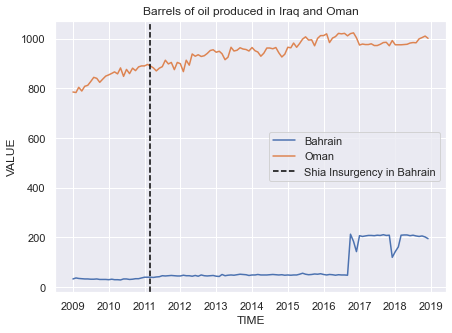

In [829]:
did7=df2[df2['COUNTRY'].isin(['Bahrain', 'Oman'])] 
did7['post']=np.where(did7['COUNTRY']>='2011-07-01',1,0) 
did7['treatment']=np.where(did7['COUNTRY']=='Bahrain',1,0) 
did7['post_treatment']=did7['post']*did7['treatment'] 
did7=did7[(did7['TIME']>='2009-01-01') & (did7['TIME']<='2018-12-01')]

sns.lineplot(data=did7,x='TIME',y='VALUE',hue='COUNTRY');
plt.axvline(pd.to_datetime('2011-03-01'),color='black',linestyle='dashed', label='Shia Insurgency in Bahrain')
plt.title('Barrels of oil produced in Iraq and Oman');
plt.legend();

In [831]:
did_model7 = ols('VALUE ~treatment + post + treatment + post_treatment', did7).fit()
print(did_model7.summary())

                            OLS Regression Results                            
Dep. Variable:                  VALUE   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                 1.114e+04
Date:                Fri, 06 Jan 2023   Prob (F-statistic):          6.90e-202
Time:                        20:36:30   Log-Likelihood:                -1333.6
No. Observations:                 240   AIC:                             2671.
Df Residuals:                     238   BIC:                             2678.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        467.9500      2.872    162.

In [830]:
year = 2011
countries = ['Bahrain', 'Oman']
treatment_date = pd.to_datetime('2011-03-01')

# apply the function and store the result in a variable
result = difference_in_difference(did7, year, countries, treatment_date)

# print the result
print(result)


                ± 1 Months  ± 2 Months  ± 3 Months  ± 4 Months  ± 5 Months  ± 6 Months
--------------------------------------------------------------------------------------
Intercept      877.444***  877.900***  876.091***  875.250***  874.077***  872.643*** 
               (4.730)     (4.503)     (4.379)     (4.297)     (4.347)     (4.395)    
treatment      -842.556*** -843.600*** -842.182*** -841.667*** -840.615*** -839.429***
               (6.689)     (6.368)     (6.193)     (6.077)     (6.148)     (6.216)    
post           21.261***   22.433***   25.856***   28.600***   32.066***   35.721***  
               (5.849)     (5.616)     (5.503)     (5.436)     (5.531)     (5.622)    
post_treatment -11.621     -11.956     -14.923*    -17.333**   -20.623**   -23.935*** 
               (8.272)     (7.943)     (7.782)     (7.687)     (7.822)     (7.951)    
R-squared      0.999       0.999       0.999       0.999       0.999       0.999      
R-squared Adj. 0.999       0.999       0.9

# The end
Our data analysis is done and it is time to explain the results. We have explained some tables, but the full results will be discussed in the "Results" tab of our website! We hope that the notebook was easy to follow and thank you for the attention!